In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

# Homework 1

## References

+ Lectures 1 through 3 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name:** Rohan
+ **Last Name:** Dekate
+ **Email:** dekate@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):**
+ **Which generative AI tool did you use (if applicable)?:**

## Problem 1 - Recursion vs Iteration

This problem adjusted from the [Structure and Interpretation of Computer Programs](https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book.html) book.
In particular from [this section](https://mitp-content-server.mit.edu/books/content/sectbyfn/books_pres_0/6515/sicp.zip/full-text/book/book-Z-H-11.html#%_sec_1.2.1).

Imagine you are working with a programming language that does not have loops.
This is how you have to think when writing code in `Jax`.
Let's say we want to write a function that calculates the factorial of a number:

$$
n! = n \times (n-1) \times (n-2) \times \dots \times 1
$$

The standard recursive definition of the factorial function is:

In [2]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

Here is how it can be used:

In [3]:
factorial(5)

120

Let's unroll what actually happens behind the scenes:

```python
factorial(5)
5 * factorial(4)
5 * (4 * factorial(3))
5 * (4 * (3 * factorial(2)))
5 * (4 * (3 * (2 * factorial(1))))
5 * (4 * (3 * (2 * 1)))
5 * (4 * (3 * 2))
5 * (4 * 6)
5 * 24
120
```

You quickly notice, that the amount of intermediate results that are stored in memory grows exponentially with the input.
This won't work for large inputs, because you will run out of memory.
But, there is another way to achieve the same result without exploding memory usage.
We could start by multiplying 1 by 2, then the result with 3, then the result with 4, and so on.
So, we keep track of a running product that we update.
We don't need a loop to do this kind of iteration.
We can do it with recursion:

In [4]:
def fact_iter(product, counter, max_iter):
    if counter > max_iter:
        return product
    else:
        return fact_iter(counter * product, counter + 1, max_iter)

def good_factorial(n):
    return fact_iter(1, 1, n)

Check that this works as before:

In [5]:
good_factorial(5)

120

Here is how this unrolls:

```python
factorial(5)
fact_iter(1, 1, 5)
fact_iter(1, 2, 5)
fact_iter(2, 3, 5)
fact_iter(6, 4, 5)
fact_iter(24, 5, 5)
fact_iter(120, 6, 5)
120
```

We say that the second approach is *iterative* and the first approach is *recursive*.
We want to be writing iterative code, because it is more efficient.

Write iterative code that, given $n$, computes the fibonacci number:

$$
f_n = f_{n-1} + f_{n-2}
$$

where $f_0 = 0$ and $f_1 = 1$.
You should not use a loop!

In [6]:
# Your code here - Demonstrate that it works
def fibonacci_iter(n,f0,f1,counter):
    if counter==n:
        return f0
    else:
        return fibonacci_iter(n,f1,f0+f1,counter+1)

def fibonacci(n):
    return fibonacci_iter(n,0,1,0)

In [7]:
fibonacci(5)

5

*Here show how your code works for $n=5$ like I did above with the factorial example.*

$\pagebreak$

## Problem 2 - The `foldl` function

The `foldl` function is a higher order function that is used to implement iteration.
It is defined as follows:

$$
\text{foldl}(f, z, [x_1, x_2, \dots, x_n]) = f(f(\dots f(f(z, x_1), x_2), \dots), x_n)
$$

where $f$ is a function that takes two arguments and $z$ is the initial value.
In words, `foldl` takes a function $f$, an initial value $z$, and a list $[x_1, x_2, \dots, x_n]$.
It then applies $f$ to $z$ and the first element of the list, then applies $f$ to the result of the previous application and the second element of the list, and so on.

Implement `foldl` in `Python`. Pay attention to create an iterative implementation.

In [8]:
# Your code here - Demonstrate that it works
def foldl(func,z,lst):
    if not lst:
        return z
    else:
        return foldl(func,func(z,lst[0]),lst[1:])

Use your `foldl` function to implement the `sum` function and the `product` function.

In [9]:
# Your code here - Demonstrate that it works
numbers = [1, 2, 3, 4, 5]
sum_result = foldl(lambda acc, x: acc + x, 0, numbers)
product_result = foldl(lambda acc, x: acc * x, 1, numbers)
print("Sum:", sum_result)
print("Product:", product_result)

Sum: 15
Product: 120


$\pagebreak$

## Problem 3 - No Loops in Jax

Use `Jax`'s [`jax.lax.scan`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.scan.html) to implement and `jit` a function that returns the Fibonacci sequence up to a given number.
Don't bother using integer types, just use `float32` for everything.

In [10]:
import jax
import jax.numpy as jnp
from jax import lax, jit
from functools import partial

@partial(jit, static_argnums=0)
def fibonacci_sequence(n):
    def fibonacci_scan_fn(carry, _):
        a, b = carry
        return (b, a + b), a

    _, fib_sequence = lax.scan(fibonacci_scan_fn, (0, 1), jnp.arange(n+1))

    return fib_sequence

# Example: Calculate Fibonacci sequence up to n=10
result = fibonacci_sequence(n=10)
print(result)

[ 0  1  1  2  3  5  8 13 21 34 55]


$\pagebreak$

# Problem 4 - Feigenbaum Map

Consider the function:

$$
f(x; r) = r x (1 - x)
$$

where $r$ is a parameter.
One can define dynamics on the real line by iterating this function:

$$
x_{n+1} = f(x_n; r)
$$

where $x_n$ is the state at time $n$.

This map exhibits a [period doubling cascade](https://en.wikipedia.org/wiki/Feigenbaum_constants) as $r$ increases.

Write a function in `jax`, call it `logistic_map`, that takes a lot of $r$'s and $x_0$'s as inputs and returns the first $n$ states of the system.
You should independently vectorize for the $r$'s and the $x_0$'s.
And you should `jit`.
Use `jax.lax.scan` to implement the iteration.

In [11]:
# Your code here - Demonstrate that it works
from functools import partial
from jax import lax, jit

@partial(jit, static_argnums=2)
def logistic_map0(r_values, x0_values, n):
    def map_step(carry, _):
        r, x = carry
        return (r, r * x * (1 - x)),x

    _, states = lax.scan(map_step, (r_values, x0_values), jnp.arange(n))

    return states

# Vectorize for r_values and x0_values
logistic_map1 = jax.vmap(logistic_map0, in_axes=(None, 0, None), out_axes=0)
logistic_map = jax.vmap(logistic_map1, in_axes=(0, None, None), out_axes=0)

Test your code here:

In [12]:
x0s = jnp.linspace(0, 1, 100)
rs = jnp.linspace(0, 4, 1_000)
n = 10_000
data = logistic_map(rs, x0s, n)

Your shape should  be `(1000, 100, 10000)`:

In [13]:
data.shape

(1000, 100, 10000)

Discard all but the last iteration:

In [14]:
data = data[:, :, -1:]

Make the famous period doubling plot. The plot will take a while and it will take a lot of memory. I suggest you restart your kernel before moving to the next problem.

In [15]:
fig, ax = plt.subplots()
ax.plot(rs,
        data.reshape(data.shape[0], data.shape[1] * data.shape[2]),
        '.k',
        ms=0.1,
        alpha=0.5
);

Output hidden; open in https://colab.research.google.com to view.

In [16]:
del data

$\pagebreak$

# Problem 5 - Analysis of Nonlinear Dynamical System

Consider the dynamical system:

$$
\dot{x_1} = \mu x_1 + x_2 - x_1^2,
$$

and

$$
\dot{x_2} = -x_1 + \mu x_2 + 2 x_1^2.
$$

Use the random initial conditions:

$$
x(0) \sim N\left(
    \begin{pmatrix}
    0 \\
    0
    \end{pmatrix},
    \begin{pmatrix}
    \sigma^2 & 0 \\
    0 & \sigma^2
    \end{pmatrix}
\right)
$$

First, write code that solves the differential equation given the initial and the parameter $\mu$.
Make sure your code is vectorized with respect to the initial conditions and that it can be `jit`ed.

+ Use first order sensitivity analysis to compute the mean and covariance matrix of the solution for the time interval $t \in [0, 10]$.
+ Implement a simple Monte Carlo procedure to compare the results of the sensitivity analysis.
+ Do it for three different values of $\mu$, $\mu=0, 0.01$, and $0.066$.
+ Use $\sigma=0.01$.
+ Plot the mean in the $x_1 - x_2$ plane for each value of $\mu$. Compare local sensitivity analysis to Monte Carlo.
+ Plot the standard deviation of $x_1$ and $x_2$ as a function of time for each value of $\mu$. Compare local sensitivity analysis to Monte Carlo.

In [17]:
!pip install diffrax==0.4.1

In [40]:
import jax
import jax.numpy as jnp
from jax import vmap, jit
from functools import partial
from diffrax import diffeqsolve, Tsit5, ODETerm, SaveAt


def solve_nonlinear_dynamics(u0, theta):

    def vector_field(t, u, theta):
        x1 = u[0]
        x2 = u[1]
        mu = theta[0]
        dx1 = mu*x1 + x2 - x1**2
        dx2 = -x1 + mu*x2 + 2*x1**2
        return jnp.array([dx1, dx2])

    return diffeqsolve(
        ODETerm(vector_field),
        Tsit5(),
        t0=0.0,
        t1=10.0,
        dt0=0.1,
        y0=u0,
        args=theta,
        saveat=SaveAt(ts=jnp.linspace(0.0, 10.0, 10_00))
    ).ys

## $\mu = 0$

In [41]:
monte_carlo_nonlinear_dynamics = jit(vmap(solve_nonlinear_dynamics, in_axes=(0, None)))

theta0 = jnp.array([0.0])

import numpy as np
# np.random.seed(1234)
mu = np.array([0.0, 0.0])
sigma = np.array([0.01, 0.01])
num_samples = 1_0000
u0_samples = np.random.normal(mu, sigma, size=(num_samples, 2))
ys_samples0 = monte_carlo_nonlinear_dynamics(u0_samples, theta0)
ys_samples0.shape

(10000, 1000, 2)

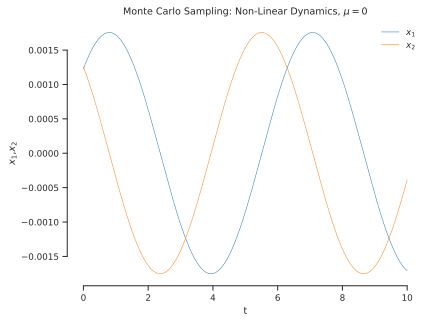

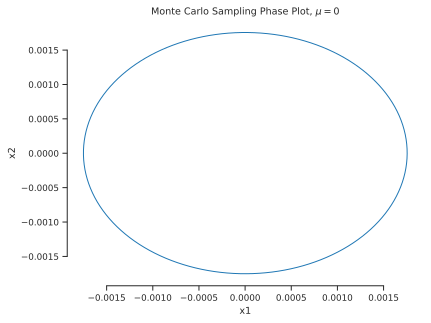

In [42]:
ts = jnp.linspace(0.0, 10.0, 10_00)
steps_to_plot = 1_000

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], ys_samples0[0, :steps_to_plot, 0], label="$x_1$", lw=0.5)
ax.plot(ts[:steps_to_plot], ys_samples0[0, :steps_to_plot, 1], label="$x_2$", lw=0.5)
ax.legend(frameon=False)
ax.set(xlabel="t", ylabel="$x_1$,$x_2$", title="Monte Carlo Sampling: Non-Linear Dynamics, $\mu = 0$")
sns.despine(trim=True)
fig, ax = plt.subplots()
ax.plot(ys_samples0[0,:,0], ys_samples0[0,:,1], lw=1)
ax.set(xlabel="x1", ylabel="x2", title="Monte Carlo Sampling Phase Plot, $\mu = 0$")
sns.despine(trim=True)

In [43]:
from jax import jacobian

jit_solve_nonlinear_dynamics = jit(solve_nonlinear_dynamics)
jit_jac_solve_nonlinear_dynamics = jit(jacobian(solve_nonlinear_dynamics, argnums=0))
mu_nonlinear_dynamics_0 = solve_nonlinear_dynamics(mu,theta0)
jac_nonlinear_dynamics_0 = jit_jac_solve_nonlinear_dynamics(mu,theta0)

print(mu_nonlinear_dynamics_0.shape) # Mean
print(jac_nonlinear_dynamics_0.shape) # Covariance Function

(1000, 2)
(1000, 2, 2)


In [22]:
var_0 = np.einsum(
    "tij,j,tij->ti",
    jac_nonlinear_dynamics_0,
    sigma ** 2,
    jac_nonlinear_dynamics_0
)
var_0 = np.sqrt(var_0)
print(var_0.shape)

(1000, 2)


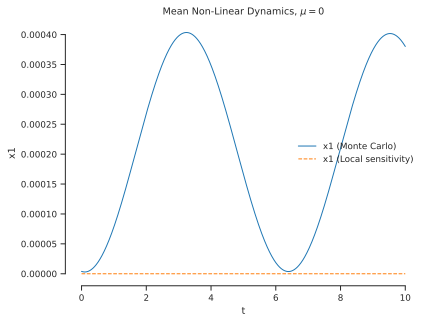

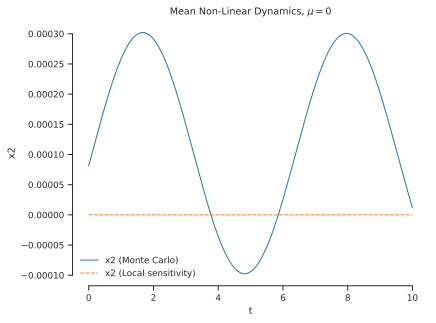

In [23]:
mc_mean_0 = ys_samples0.mean(axis=0)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_mean_0[:steps_to_plot, 0], label="x1 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], mu_nonlinear_dynamics_0[:steps_to_plot, 0], '--', label="x1 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="x1", title="Mean Non-Linear Dynamics, $\mu = 0$")
ax.legend(frameon=False)
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_mean_0[:steps_to_plot, 1], label="x2 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], mu_nonlinear_dynamics_0[:steps_to_plot, 1], '--', label="x2 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="x2", title="Mean Non-Linear Dynamics, $\mu = 0$")
ax.legend(frameon=False)
sns.despine(trim=True)

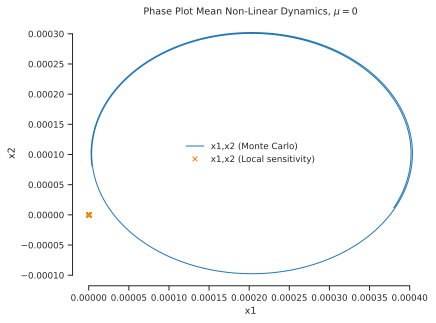

In [24]:
fig, ax = plt.subplots()
ax.plot(mc_mean_0[:steps_to_plot, 0], mc_mean_0[:steps_to_plot, 1], label="x1,x2 (Monte Carlo)", lw=1)
ax.plot(mu_nonlinear_dynamics_0[:steps_to_plot, 0], mu_nonlinear_dynamics_0[:steps_to_plot, 1], 'x', label="x1,x2 (Local sensitivity)", lw=1)
ax.set(xlabel="x1", ylabel="x2", title="Phase Plot Mean Non-Linear Dynamics, $\mu = 0$")
ax.legend(frameon=False)
sns.despine(trim=True)

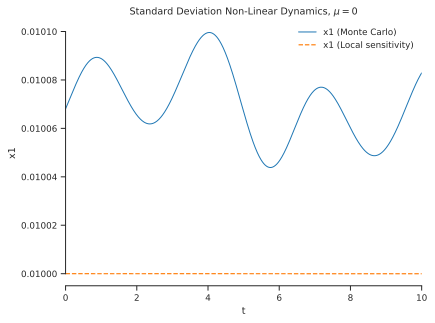

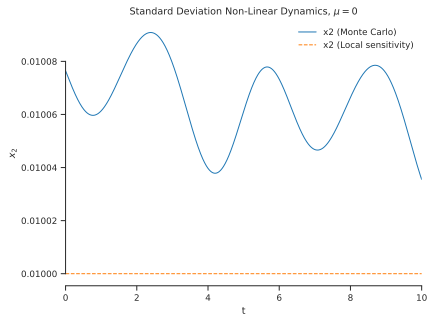

In [25]:
mc_var_0 = ys_samples0.std(axis=0)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_var_0[:steps_to_plot, 0], label="x1 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], var_0[:steps_to_plot,0], '--', label="x1 (Local sensitivity)")
ax.set(xlabel="t", ylabel="x1", title="Standard Deviation Non-Linear Dynamics, $\mu = 0$")
ax.legend(frameon=False)
ax.set_xlim(0, 10)
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_var_0[:steps_to_plot, 1], label="x2 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], var_0[:steps_to_plot, 1], '--', label="x2 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="$x_2$", title="Standard Deviation Non-Linear Dynamics, $\mu = 0$")
ax.legend(frameon=False)
ax.set_xlim(0, 10)
sns.despine(trim=True)

## $\mu = 0.01$

In [26]:
theta1 = jnp.array([0.01])
ys_samples1 = monte_carlo_nonlinear_dynamics(u0_samples, theta1)
ys_samples1.shape

(10000, 1000, 2)

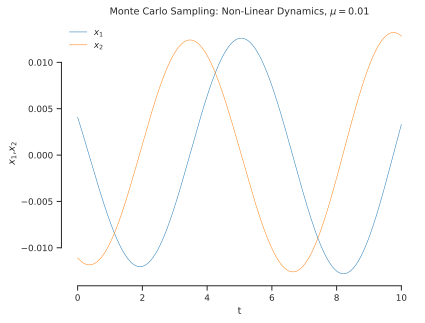

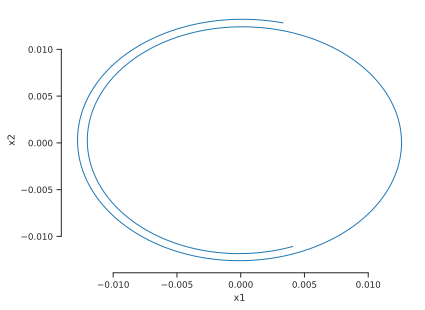

In [27]:
ts = jnp.linspace(0.0, 10.0, 10_00)
steps_to_plot = 1_000

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], ys_samples1[0, :steps_to_plot, 0], label="$x_1$", lw=0.5)
ax.plot(ts[:steps_to_plot], ys_samples1[0, :steps_to_plot, 1], label="$x_2$", lw=0.5)
ax.legend(frameon=False)
ax.set(xlabel="t", ylabel="$x_1$,$x_2$", title="Monte Carlo Sampling: Non-Linear Dynamics, $\mu = 0.01$")
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ys_samples1[0,:,0], ys_samples1[0,:,1], lw=1)
ax.set(xlabel="x1", ylabel="x2")
sns.despine(trim=True)

In [28]:
mu_nonlinear_dynamics_1 = solve_nonlinear_dynamics(mu,theta1)
jac_nonlinear_dynamics_1 = jit_jac_solve_nonlinear_dynamics(mu,theta1)

print(mu_nonlinear_dynamics_1.shape) # Mean
print(jac_nonlinear_dynamics_1.shape) # Covariance Function

(1000, 2)
(1000, 2, 2)


In [29]:
var_1 = np.einsum(
    "tij,j,tij->ti",
    jac_nonlinear_dynamics_1,
    sigma ** 2,
    jac_nonlinear_dynamics_1
)
var_1 = np.sqrt(var_1)
print(var_1.shape)

(1000, 2)


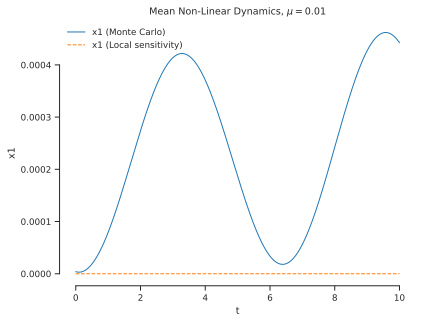

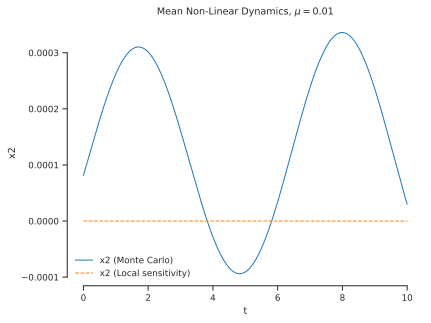

In [30]:
mc_mean_1 = ys_samples1.mean(axis=0)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_mean_1[:steps_to_plot, 0], label="x1 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], mu_nonlinear_dynamics_1[:steps_to_plot, 0], '--', label="x1 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="x1", title="Mean Non-Linear Dynamics, $\mu = 0.01$")
ax.legend(frameon=False)
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_mean_1[:steps_to_plot, 1], label="x2 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], mu_nonlinear_dynamics_1[:steps_to_plot, 1], '--', label="x2 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="x2", title="Mean Non-Linear Dynamics, $\mu = 0.01$")
ax.legend(frameon=False)
sns.despine(trim=True)

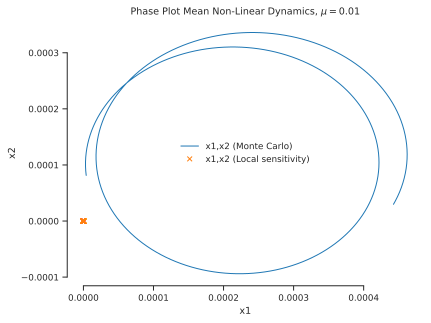

In [31]:
fig, ax = plt.subplots()
ax.plot(mc_mean_1[:steps_to_plot, 0], mc_mean_1[:steps_to_plot, 1], label="x1,x2 (Monte Carlo)", lw=1)
ax.plot(mu_nonlinear_dynamics_1[:steps_to_plot, 0], mu_nonlinear_dynamics_1[:steps_to_plot, 1], 'x', label="x1,x2 (Local sensitivity)", lw=1)
ax.set(xlabel="x1", ylabel="x2", title="Phase Plot Mean Non-Linear Dynamics, $\mu = 0.01$")
ax.legend(frameon=False)
sns.despine(trim=True)

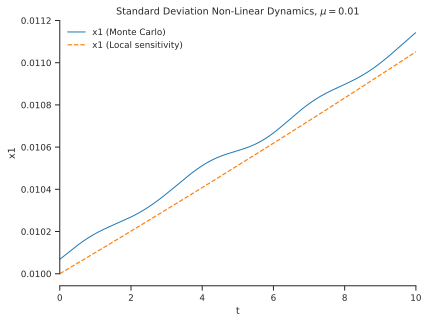

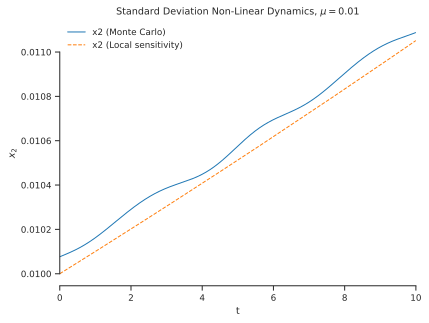

In [32]:
mc_var_1 = ys_samples1.std(axis=0)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_var_1[:steps_to_plot, 0], label="x1 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], var_1[:steps_to_plot,0], '--', label="x1 (Local sensitivity)")
ax.set(xlabel="t", ylabel="x1", title="Standard Deviation Non-Linear Dynamics, $\mu = 0.01$")
ax.legend(frameon=False)
ax.set_xlim(0, 10)
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_var_1[:steps_to_plot, 1], label="x2 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], var_1[:steps_to_plot, 1], '--', label="x2 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="$x_2$", title="Standard Deviation Non-Linear Dynamics, $\mu = 0.01$")
ax.legend(frameon=False)
ax.set_xlim(0, 10)
sns.despine(trim=True)

## $\mu = 0.066$

In [33]:
theta2 = jnp.array([0.066])
ys_samples2 = monte_carlo_nonlinear_dynamics(u0_samples, theta2)
ys_samples2.shape

(10000, 1000, 2)

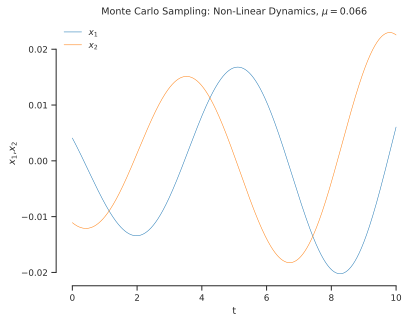

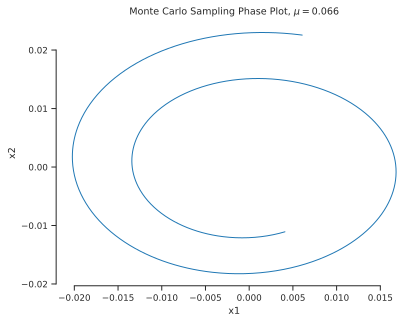

In [34]:
ts = jnp.linspace(0.0, 10.0, 10_00)
steps_to_plot = 1_000

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], ys_samples2[0, :steps_to_plot, 0], label="$x_1$", lw=0.5)
ax.plot(ts[:steps_to_plot], ys_samples2[0, :steps_to_plot, 1], label="$x_2$", lw=0.5)
ax.legend(frameon=False)
ax.set(xlabel="t", ylabel="$x_1$,$x_2$", title="Monte Carlo Sampling: Non-Linear Dynamics, $\mu = 0.066$")
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ys_samples2[0,:,0], ys_samples2[0,:,1], lw=1)
ax.set(xlabel="x1", ylabel="x2", title="Monte Carlo Sampling Phase Plot, $\mu = 0.066$")
sns.despine(trim=True)

In [35]:
mu_nonlinear_dynamics_2 = solve_nonlinear_dynamics(mu,theta2)
jac_nonlinear_dynamics_2 = jit_jac_solve_nonlinear_dynamics(mu,theta2)

print(mu_nonlinear_dynamics_2.shape) # Mean
print(jac_nonlinear_dynamics_2.shape) # Covariance Function

(1000, 2)
(1000, 2, 2)


In [36]:
var_2 = np.einsum(
    "tij,j,tij->ti",
    jac_nonlinear_dynamics_2,
    sigma ** 2,
    jac_nonlinear_dynamics_2
)
var_2 = np.sqrt(var_2)
print(var_2.shape)

(1000, 2)


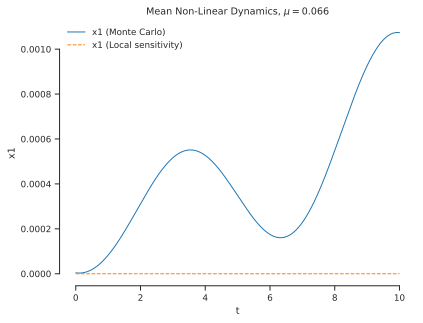

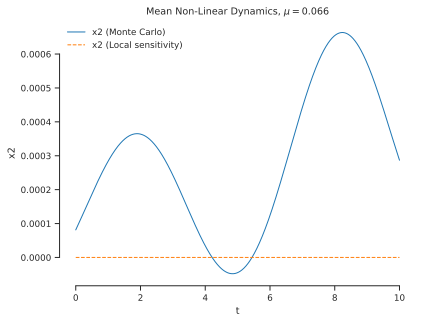

In [37]:
mc_mean_2 = ys_samples2.mean(axis=0)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_mean_2[:steps_to_plot, 0], label="x1 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], mu_nonlinear_dynamics_2[:steps_to_plot, 0], '--', label="x1 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="x1", title="Mean Non-Linear Dynamics, $\mu = 0.066$")
ax.legend(frameon=False)
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_mean_2[:steps_to_plot, 1], label="x2 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], mu_nonlinear_dynamics_2[:steps_to_plot, 1], '--', label="x2 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="x2", title="Mean Non-Linear Dynamics, $\mu = 0.066$")
ax.legend(frameon=False)
sns.despine(trim=True)

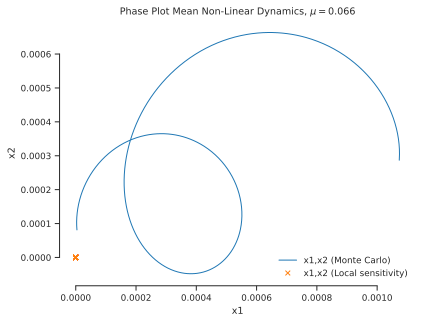

In [38]:
fig, ax = plt.subplots()
ax.plot(mc_mean_2[:steps_to_plot, 0], mc_mean_2[:steps_to_plot, 1], label="x1,x2 (Monte Carlo)", lw=1)
ax.plot(mu_nonlinear_dynamics_2[:steps_to_plot, 0], mu_nonlinear_dynamics_2[:steps_to_plot, 1], 'x', label="x1,x2 (Local sensitivity)", lw=1)
ax.set(xlabel="x1", ylabel="x2", title="Phase Plot Mean Non-Linear Dynamics, $\mu = 0.066$")
ax.legend(frameon=False)
sns.despine(trim=True)

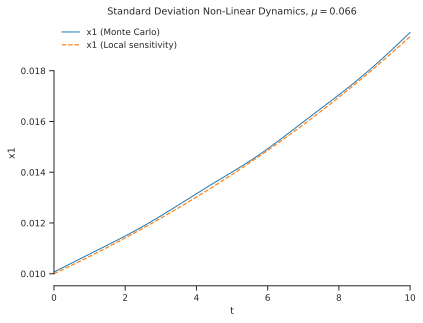

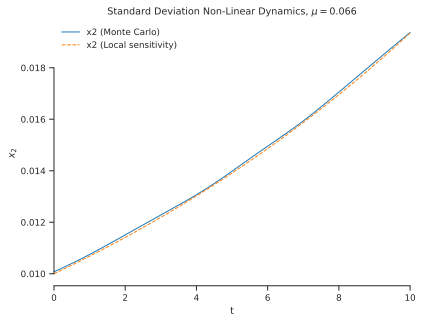

In [39]:
mc_var_2 = ys_samples2.std(axis=0)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_var_2[:steps_to_plot, 0], label="x1 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], var_2[:steps_to_plot,0], '--', label="x1 (Local sensitivity)")
ax.set(xlabel="t", ylabel="x1", title="Standard Deviation Non-Linear Dynamics, $\mu = 0.066$")
ax.legend(frameon=False)
ax.set_xlim(0, 10)
sns.despine(trim=True)

fig, ax = plt.subplots()
ax.plot(ts[:steps_to_plot], mc_var_2[:steps_to_plot, 1], label="x2 (Monte Carlo)", lw=1)
ax.plot(ts[:steps_to_plot], var_2[:steps_to_plot, 1], '--', label="x2 (Local sensitivity)", lw=1)
ax.set(xlabel="t", ylabel="$x_2$", title="Standard Deviation Non-Linear Dynamics, $\mu = 0.066$")
ax.legend(frameon=False)
ax.set_xlim(0, 10)
sns.despine(trim=True)